In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank_dataset.csv',sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

education
middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64

<Axes: ylabel='job'>

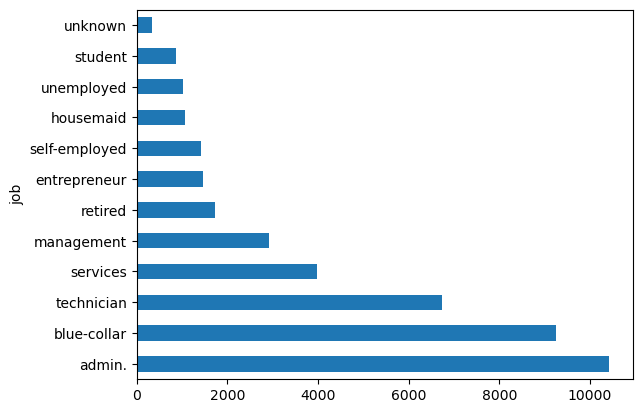

In [7]:
job_count=df.job.value_counts()
job_count
job_count.plot(kind="barh")

<Axes: ylabel='marital'>

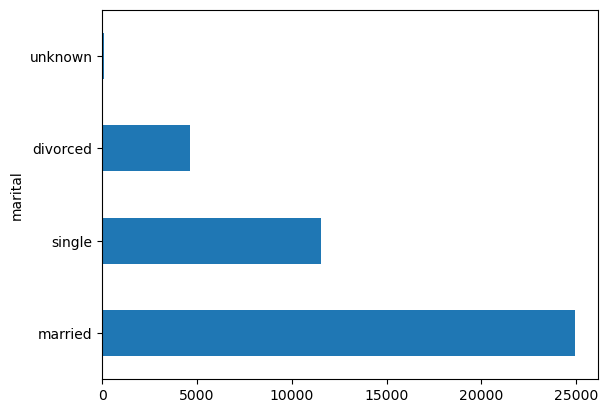

In [8]:
Marital_count=df.marital.value_counts()
Marital_count
Marital_count.plot(kind="barh")

<Axes: ylabel='education'>

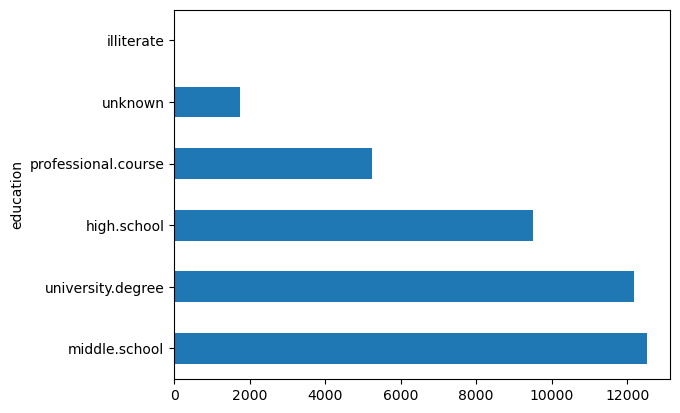

In [9]:
Education_count=df.education.value_counts()
Education_count
Education_count.plot(kind="barh")

<Axes: ylabel='contact'>

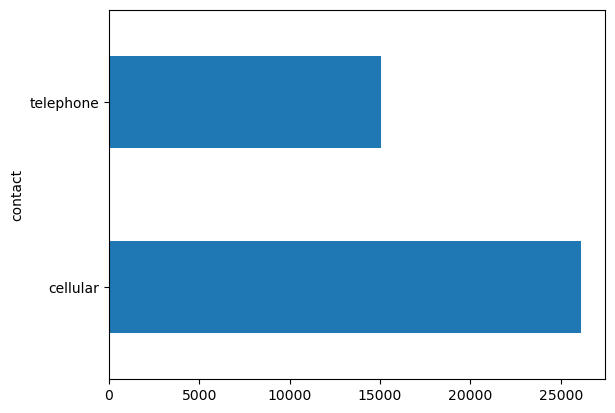

In [10]:
Contact_count=df.contact.value_counts()
Contact_count
Contact_count.plot(kind="barh")

<Axes: ylabel='poutcome'>

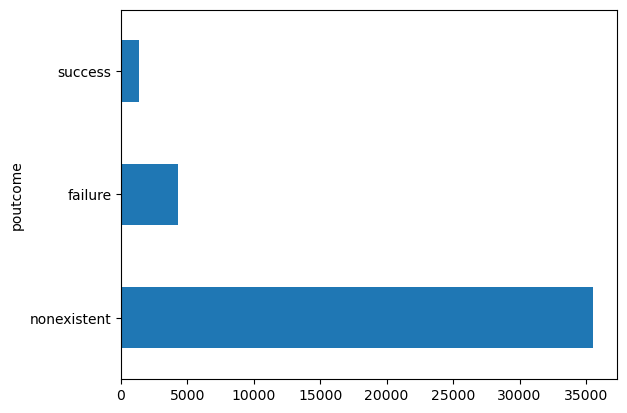

In [11]:
Poutcome_count=df.poutcome.value_counts()
Poutcome_count
Poutcome_count.plot(kind="barh")

<Axes: ylabel='housing'>

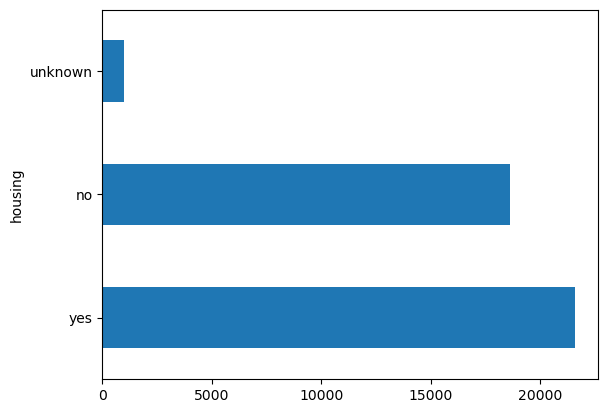

In [12]:
Housing_loan_count=df.housing.value_counts()
Housing_loan_count
Housing_loan_count.plot(kind="barh")

<Axes: ylabel='loan'>

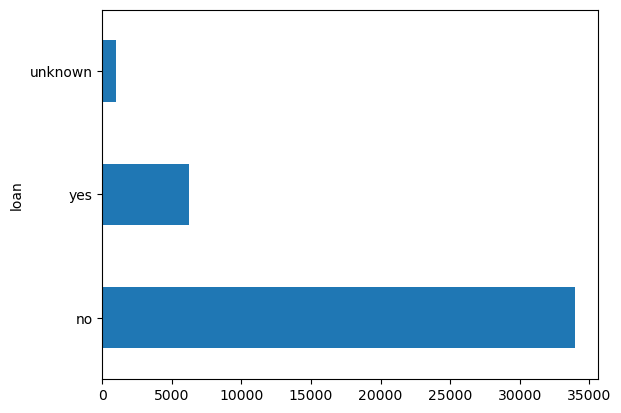

In [13]:
Personal_loan_count=df.loan.value_counts()
Personal_loan_count
Personal_loan_count.plot(kind="barh")

<Axes: ylabel='default'>

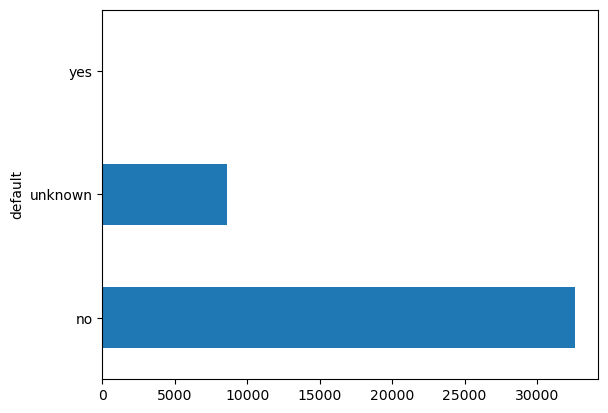

In [14]:
Default_count=df.default.value_counts()
Default_count
Default_count.plot(kind="barh")

In [15]:
## NUMERIC VARIABLES ##

(array([1.400e+02, 4.650e+02, 1.759e+03, 3.305e+03, 7.340e+03, 5.284e+03,
        4.314e+03, 3.581e+03, 4.199e+03, 2.746e+03, 2.408e+03, 2.065e+03,
        2.389e+03, 4.180e+02, 1.560e+02, 1.160e+02, 1.680e+02, 9.000e+01,
        8.100e+01, 6.500e+01, 5.600e+01, 3.100e+01, 4.000e+00, 5.000e+00,
        3.000e+00]),
 array([17.  , 20.24, 23.48, 26.72, 29.96, 33.2 , 36.44, 39.68, 42.92,
        46.16, 49.4 , 52.64, 55.88, 59.12, 62.36, 65.6 , 68.84, 72.08,
        75.32, 78.56, 81.8 , 85.04, 88.28, 91.52, 94.76, 98.  ]),
 <BarContainer object of 25 artists>)

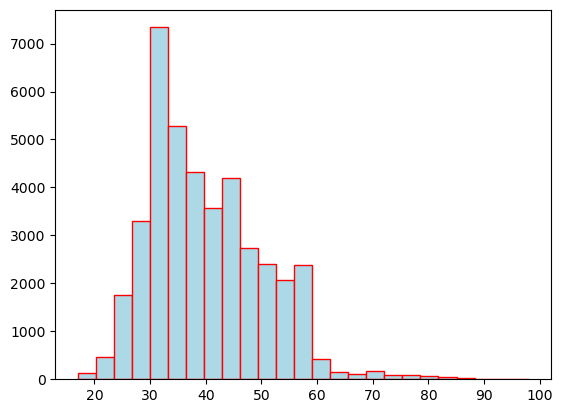

In [16]:
plt.hist(df['age'],bins=25,color = "lightblue", ec="red")

(array([3.3553e+04, 4.2500e+03, 1.6080e+03, 6.8300e+02, 4.0200e+02,
        2.8600e+02, 1.0200e+02, 9.1000e+01, 5.6000e+01, 4.1000e+01,
        3.9000e+01, 1.9000e+01, 1.8000e+01, 1.4000e+01, 8.0000e+00,
        8.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ,
        25.2, 27.4, 29.6, 31.8, 34. , 36.2, 38.4, 40.6, 42.8, 45. , 47.2,
        49.4, 51.6, 53.8, 56. ]),
 <BarContainer object of 25 artists>)

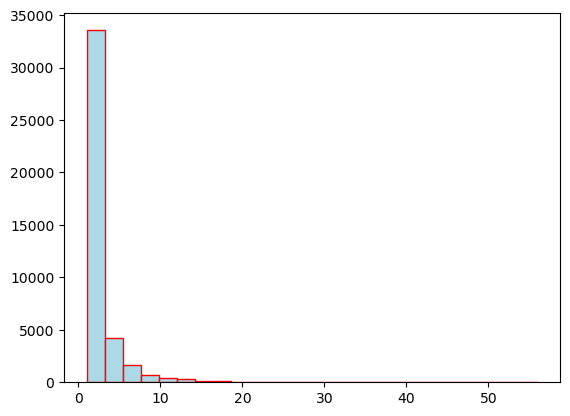

In [17]:
plt.hist(df['campaign'],bins=25,color = "lightblue", ec="red")

(array([2.2343e+04, 1.1432e+04, 3.8300e+03, 1.7300e+03, 8.4300e+02,
        4.6400e+02, 2.5300e+02, 1.2600e+02, 6.3000e+01, 3.7000e+01,
        2.5000e+01, 1.0000e+01, 9.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  196.72,  393.44,  590.16,  786.88,  983.6 , 1180.32,
        1377.04, 1573.76, 1770.48, 1967.2 , 2163.92, 2360.64, 2557.36,
        2754.08, 2950.8 , 3147.52, 3344.24, 3540.96, 3737.68, 3934.4 ,
        4131.12, 4327.84, 4524.56, 4721.28, 4918.  ]),
 <BarContainer object of 25 artists>)

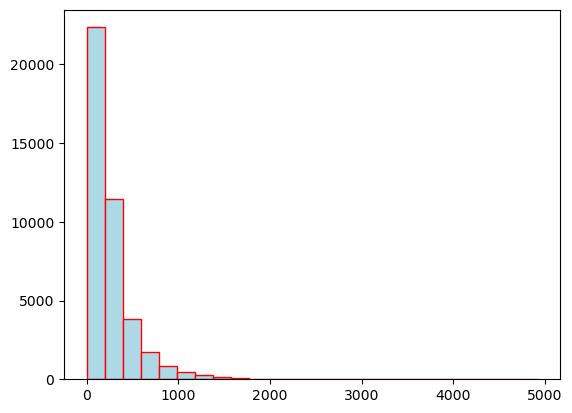

In [18]:
plt.hist(df['duration'],bins=25,color = "lightblue", ec="red")

(array([ 1515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        39673.]),
 array([  0.  ,  39.96,  79.92, 119.88, 159.84, 199.8 , 239.76, 279.72,
        319.68, 359.64, 399.6 , 439.56, 479.52, 519.48, 559.44, 599.4 ,
        639.36, 679.32, 719.28, 759.24, 799.2 , 839.16, 879.12, 919.08,
        959.04, 999.  ]),
 <BarContainer object of 25 artists>)

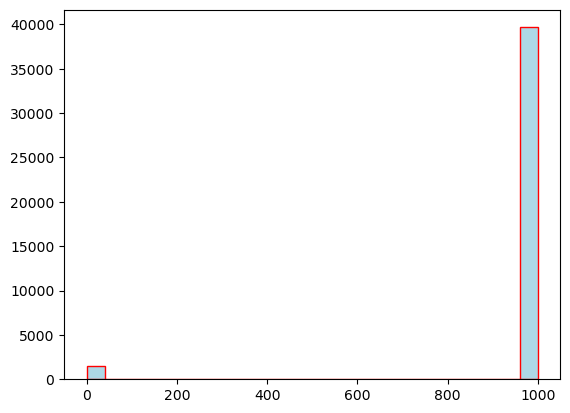

In [19]:
plt.hist(df['pdays'],bins=25,color = "lightblue", ec="red")

(array([3.5563e+04, 0.0000e+00, 0.0000e+00, 4.5610e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.5400e+02, 0.0000e+00, 0.0000e+00,
        2.1600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+01,
        0.0000e+00, 0.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.  , 0.28, 0.56, 0.84, 1.12, 1.4 , 1.68, 1.96, 2.24, 2.52, 2.8 ,
        3.08, 3.36, 3.64, 3.92, 4.2 , 4.48, 4.76, 5.04, 5.32, 5.6 , 5.88,
        6.16, 6.44, 6.72, 7.  ]),
 <BarContainer object of 25 artists>)

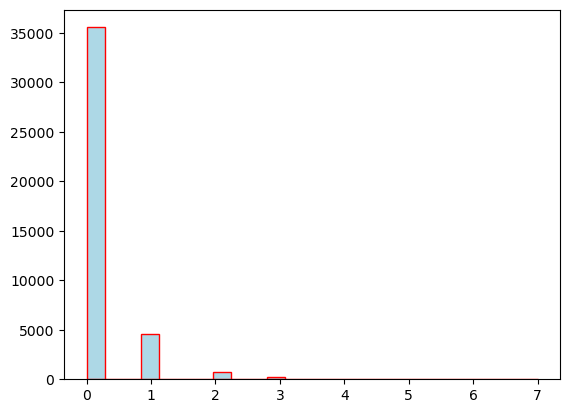

In [20]:
plt.hist(df['previous'],bins=25,color = "lightblue", ec="red")

In [21]:
import pandas as pd

# Function to identify and remove near-zero variance variables
def removeNearZeroVar(df, unique_fraction_threshold=0.10, prevalence_ratio_threshold=20):
    low_var_cols = []
    for col in df.columns:
        unique_vals = df[col].nunique()
        unique_fraction = unique_vals / len(df)
        
        if unique_fraction <= unique_fraction_threshold:
            value_counts = df[col].value_counts()
            top_value_count = value_counts.iloc[0]
            second_value_count = value_counts.iloc[1] if len(value_counts) > 1 else 0
            
            prevalence_ratio = top_value_count / second_value_count
            
            if prevalence_ratio >= prevalence_ratio_threshold:
                low_var_cols.append(col)
    
    df = df.drop(columns=low_var_cols)
    return df

# Set thresholds for unique fraction and prevalence ratio
unique_fraction_threshold = 0.10
prevalence_ratio_threshold = 20

# Remove near-zero variance variables
df = removeNearZeroVar(df, unique_fraction_threshold, prevalence_ratio_threshold)

# Display the DataFrame after removing near-zero variance variables
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,middle.school,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,middle.school,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [22]:
df=df.drop(columns=['duration','default'])
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,middle.school,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,middle.school,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
# Set the random seed for reproducibility
np.random.seed(100)

# Create a boolean mask for the train dataset (80%)
insample = np.random.rand(len(df)) < 0.8

# Create 'bank_train' as the train data
bank_train = df[insample]

# Create 'bank_test' as the test data
bank_test = df[~insample]

proportion_table = bank_train['y'].value_counts(normalize=True).round(2)

print(proportion_table)


y
no     0.89
yes    0.11
Name: proportion, dtype: float64


In [24]:
# Set the random seed for reproducibility
np.random.seed(100)

# Split the DataFrame into two based on the target class
bank_train_majority = bank_train[bank_train['y'] == 'no']
bank_train_minority = bank_train[bank_train['y'] == 'yes']

# Determine the size of the majority class
majority_class_size = len(bank_train_majority)
majority_class_size

# # Upsample the minority class to match the size of the majority class
bank_train_minority_upsampled = bank_train_minority.sample(majority_class_size, replace=True)

# # Combine the upsampled minority class with the majority class
bank_train_up = pd.concat([bank_train_majority, bank_train_minority_upsampled])
bank_train_up
# # Shuffle the combined DataFrame to randomize the order
bank_train_up = bank_train_up.sample(frac=1, random_state=100)

# # Check the proportion of the target class
target_proportions = bank_train_up['y'].value_counts(normalize=True)

print(target_proportions)

y
yes    0.5
no     0.5
Name: proportion, dtype: float64


In [25]:
# Extract the target column 'y'
y = bank_train_up['y']

# Drop the target column to create the feature DataFrame
X = bank_train_up.drop(columns=['y'])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [26]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,
                                                    random_state=42)

In [27]:
# Concatenate the training and testing data
combined_data = pd.concat([X_train, X_test], axis=0)

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore')
X_combined_encoded = encoder.fit_transform(combined_data)

# Determine the index to split the combined encoded data back into train and test
train_data_len = len(X_train)
X_encoded = X_combined_encoded[:train_data_len]
X_new_encoded = X_combined_encoded[train_data_len:]

In [28]:
# Extract the target column 'y'
y_bank_test = bank_test['y']

# Drop the target column to create the feature DataFrame
X_bank_test = bank_test.drop(columns=['y'])

y_bank_test=label_encoder.fit_transform(y_bank_test)

X_encoded_test=encoder.transform(X_bank_test)
len(X_encoded_test)

8248

In [29]:
param_grid_1 = {
    'var_smoothing': [1e-9, 1e-7, 1e-7,1e-6, 1e-5]
}

param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 15),
    'min_samples_leaf': randint(2, 15),
    'min_samples_split':randint(2, 15),
}

param_grid_3 = {
    'learning_rate': uniform(0.01, 0.5),  # Continuous uniform distribution
    'max_depth': randint(3, 15),          # Discrete uniform distribution
    'min_child_weight': randint(1,3),
    'n_estimators': [20,50,100,150,200,250,300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

In [30]:
def common_func(X_train, y_train, X_test, model, param_distributions):
    input_model = model
    random_search = RandomizedSearchCV(estimator=input_model, 
                                       param_distributions=param_distributions,
                                       n_iter=5, cv=5, scoring='accuracy', 
                                       random_state=42)
    random_search.fit(X_encoded, y_train)
    print("Best Hyperparameters:", random_search.best_params_)
    best_parameter = random_search.best_estimator_
    return best_parameter

def fit_and_find_best_hyperparameter_GNB(X_train, y_train, X_test):
    return common_func(X_train, y_train, X_test, GaussianNB(), param_grid_1)

def fit_and_find_best_hyperparameter_DT(X_train, y_train, X_test):
    return common_func(X_train, y_train, X_test, DecisionTreeClassifier(),
                       param_grid_2)

def fit_and_find_best_hyperparameter_XGB(X_train, y_train, X_test):
    return common_func(X_train, y_train, X_test, XGBClassifier(), param_grid_3)

def prediction_test(X_test,model):
    y_pred_test = model.predict(X_test)
    return y_pred_test

def prediction_probability_test(X_test,model):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_pred_prob


def accuracy(y_test,y_pred_test):
    return accuracy_score(y_test, y_pred_test)    

    
def roc_auc(y_test,y_prob_test):
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    # Calculate AUC
    roc_auc = roc_auc_score(y_test, y_prob_test)
    print("AUC_value:", round(roc_auc,2))
    plt.figure()
    plt.plot(fpr, tpr, color='#519259', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_test,y_pred_test):
    # Compute the confusion matrix
    confusion = confusion_matrix(y_test, y_pred_test)
    # Display the confusion matrix
    Confusion_Matrix_Display=ConfusionMatrixDisplay(confusion, display_labels=["no", "yes"]).plot()
    return Confusion_Matrix_Display

def generate_classification_report(y_test,y_pred_test):
# Generate a classification report
    report = classification_report(y_test, y_pred_test)
    return report

In [31]:
best_gnb_model= fit_and_find_best_hyperparameter_GNB(X_encoded, y_train,
                                                     X_new_encoded)
y_pred_test_gbt=prediction_test(X_new_encoded,best_gnb_model)

Best Hyperparameters: {'var_smoothing': 1e-09}


In [32]:
Accuracy_gb=round(accuracy_score(y_test,y_pred_test_gbt),2)
print("Accuracy:", Accuracy_gb)

Accuracy: 0.74


In [33]:
# Prediction for testing data
pred_naive_bank_test = best_gnb_model.predict(X_encoded_test)
predictions = pd.DataFrame({'Predicted_Class': pred_naive_bank_test})
# Display the predictions
print(predictions)

      Predicted_Class
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
8243                1
8244                0
8245                1
8246                1
8247                1

[8248 rows x 1 columns]


In [34]:
#Accuracy for testing data
Accuracy_gb_bank_test=round(accuracy_score(y_bank_test,pred_naive_bank_test),2)
print("Accuracy:", Accuracy_gb_bank_test)

Accuracy: 0.79


In [35]:
# Confusion matrix for testing data
con_naive_bank_test = confusion_matrix(y_bank_test, pred_naive_bank_test)
print("Confusion Matrix for Testing Data:")
print(con_naive_bank_test)

Confusion Matrix for Testing Data:
[[5844 1446]
 [ 311  647]]


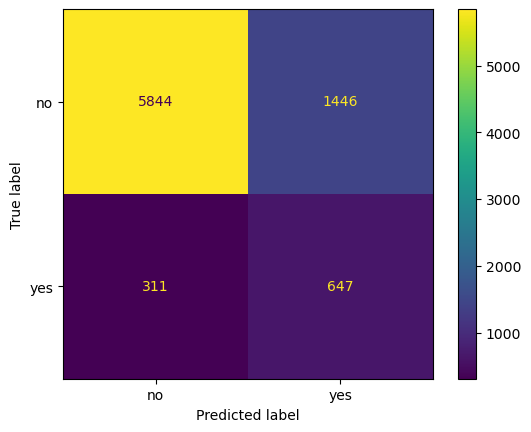

In [36]:
plot_confusion_matrix(y_bank_test,pred_naive_bank_test)

In [37]:
print(classification_report(y_bank_test, pred_naive_bank_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7290
           1       0.31      0.68      0.42       958

    accuracy                           0.79      8248
   macro avg       0.63      0.74      0.65      8248
weighted avg       0.88      0.79      0.82      8248



In [38]:
y_prob_bank_test_gb = prediction_probability_test(X_encoded_test,best_gnb_model)    # Predicted probabilities for class "yes"
y_prob_bank_test_gb

array([1.66422095e-25, 1.52767951e-22, 1.52767951e-22, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

AUC_value: 0.76


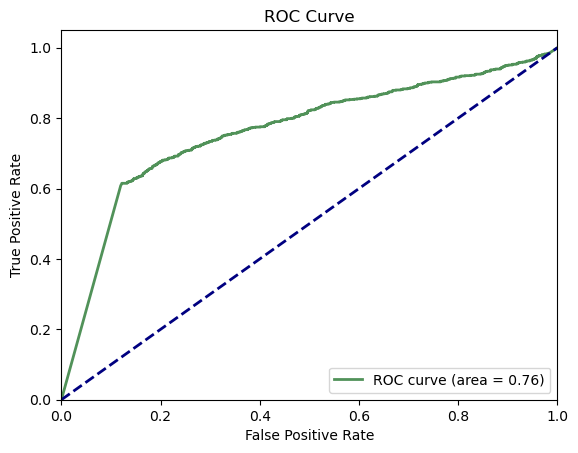

In [39]:
roc_auc_gaussian=roc_auc(y_bank_test,y_prob_bank_test_gb)

In [40]:
best_dt_model= fit_and_find_best_hyperparameter_DT(X_encoded, y_train
                                                   ,X_new_encoded)
y_pred_test_dt=prediction_test(X_new_encoded,best_dt_model)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 8}


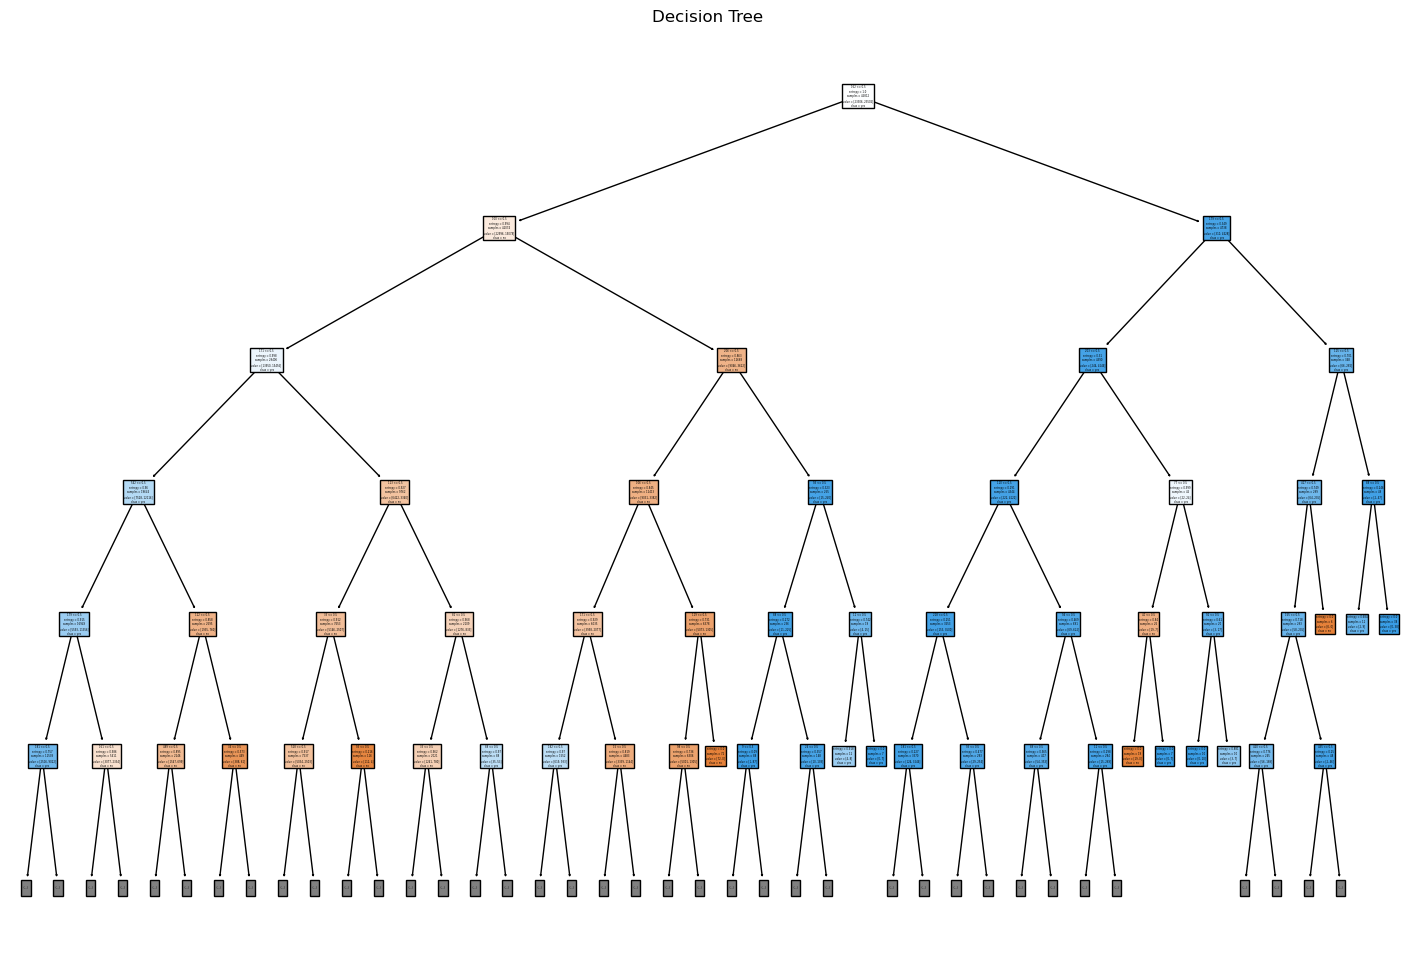

In [41]:
plt.figure(figsize=(18, 12))  

# Visualize the decision tree with a limited depth (e.g., max_depth=5)
plot_tree(
    best_dt_model,
    filled=True,
    feature_names=[str(i) for i in range(X_encoded.shape[1])],
    class_names=["no", "yes"],
    max_depth=5  # Limit the depth for better visualization
)
plt.title("Decision Tree")
plt.show()


In [42]:
# Accuracy for training data
Accuracy_dt=round(accuracy_score(y_test,y_pred_test_dt),2)
print("Accuracy:", Accuracy_dt)

Accuracy: 0.77


In [43]:
# Prediction for testing data
pred_naive_bank_test_dt = best_dt_model.predict(X_encoded_test)
predictions = pd.DataFrame({'Predicted_Class': pred_naive_bank_test_dt})
# Display the predictions
print(predictions)

      Predicted_Class
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
8243                1
8244                1
8245                1
8246                1
8247                1

[8248 rows x 1 columns]


In [44]:
# Accuracy for testing data
Accuracy_dt_bank_test_dt=round(accuracy_score(y_bank_test,pred_naive_bank_test_dt),2)
print("Accuracy:", Accuracy_dt_bank_test_dt)

Accuracy: 0.82


In [45]:
# Confusion matrix for testing data
con_naive_bank_test_dt = confusion_matrix(y_bank_test, pred_naive_bank_test_dt)
print("Confusion Matrix for Testind Data:")
print(con_naive_bank_test_dt)

Confusion Matrix for Testind Data:
[[6214 1076]
 [ 397  561]]


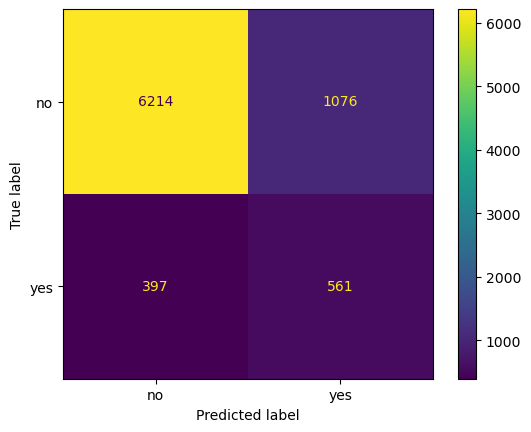

In [46]:
plot_confusion_matrix(y_bank_test,pred_naive_bank_test_dt)

In [47]:
print(classification_report(y_bank_test, pred_naive_bank_test_dt))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7290
           1       0.34      0.59      0.43       958

    accuracy                           0.82      8248
   macro avg       0.64      0.72      0.66      8248
weighted avg       0.87      0.82      0.84      8248



In [48]:
y_prob_bank_test_dt = prediction_probability_test(X_encoded_test,best_dt_model)     # Predicted probabilities for class "yes"
y_prob_bank_test_dt

array([0.22413793, 0.22413793, 0.22413793, ..., 0.66666667, 0.90861495,
       0.90861495])

AUC_value: 0.75


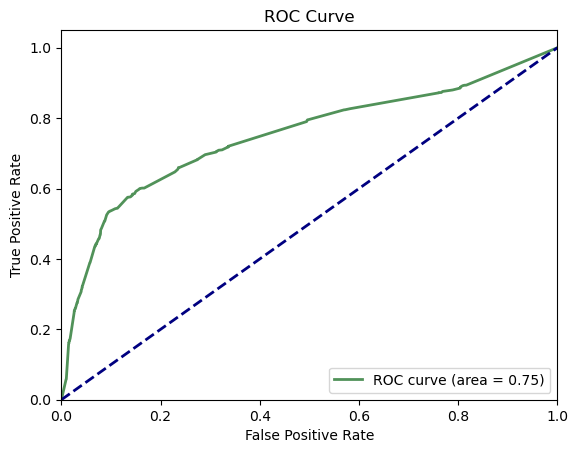

In [49]:
roc_auc_dt=roc_auc(y_bank_test,y_prob_bank_test_dt)

In [50]:
best_XGB_model= fit_and_find_best_hyperparameter_XGB(X_encoded,y_train
                                                     ,X_new_encoded)
y_pred_test_XGB=prediction_test(X_new_encoded,best_XGB_model)

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2723873301291946, 'max_depth': 12, 'min_child_weight': 2, 'n_estimators': 150, 'reg_alpha': 0.2, 'reg_lambda': 0.1, 'subsample': 0.9}


In [51]:
Accuracy_XGB=round(accuracy_score(y_test,y_pred_test_XGB),2)
print("Accuracy:", Accuracy_XGB)

Accuracy: 0.91


In [52]:
# Prediction for testing data
pred_naive_bank_test_xgb = best_XGB_model.predict(X_encoded_test)
predictions = pd.DataFrame({'Predicted_Class': y_pred_test_XGB})

# Display the predictions
print(predictions)

       Predicted_Class
0                    0
1                    1
2                    0
3                    1
4                    1
...                ...
11699                0
11700                1
11701                1
11702                0
11703                1

[11704 rows x 1 columns]


In [53]:
# Accuracy for testing data
Accuracy_xgb_bank_test=round(accuracy_score(y_bank_test,
                                               pred_naive_bank_test_xgb),2)
print("Accuracy:", Accuracy_xgb_bank_test)

Accuracy: 0.85


In [54]:
# Confusion matrix for testing data
con_naive_bank_test_xgb = confusion_matrix(y_bank_test, pred_naive_bank_test_xgb)

print("Confusion Matrix for Testing Data:")
print(con_naive_bank_test_xgb)

Confusion Matrix for Testing Data:
[[6499  791]
 [ 463  495]]


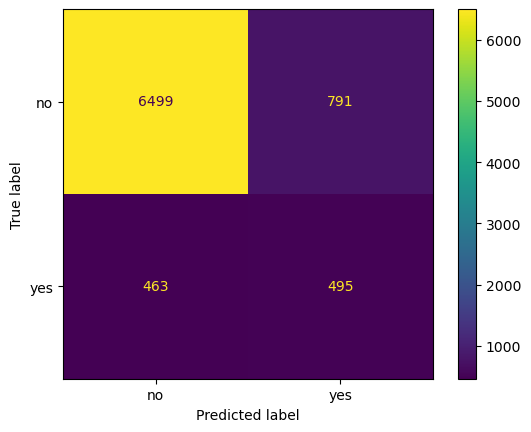

In [55]:
plot_confusion_matrix(y_bank_test,pred_naive_bank_test_xgb)

In [56]:
print(classification_report(y_bank_test, pred_naive_bank_test_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7290
           1       0.38      0.52      0.44       958

    accuracy                           0.85      8248
   macro avg       0.66      0.70      0.68      8248
weighted avg       0.87      0.85      0.86      8248



In [57]:
y_prob_bank_test_xgb = prediction_probability_test(X_encoded_test,best_XGB_model)   # Predicted probabilities for class "yes"
y_prob_bank_test_xgb

array([0.06611037, 0.03628018, 0.03628018, ..., 0.40327084, 0.84679294,
       0.758814  ], dtype=float32)

AUC_value: 0.76


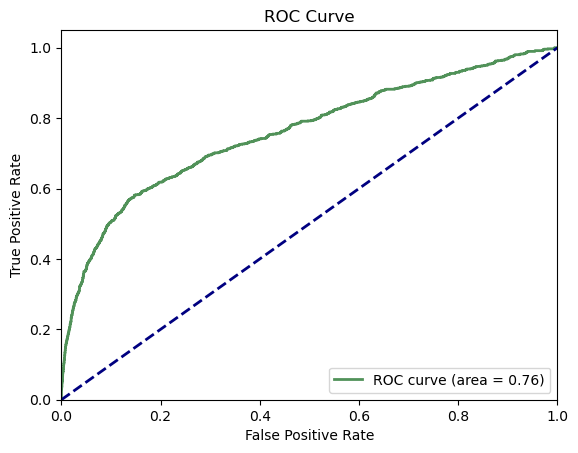

In [58]:
roc_auc_dt=roc_auc(y_bank_test,y_prob_bank_test_xgb)

In [59]:
data = {'Model': ['Gaussian Naive Bayes', 'Decision Tree', 'XGB'],
        'Accuracy_Score': [Accuracy_gb_bank_test, Accuracy_dt_bank_test_dt,
                           Accuracy_xgb_bank_test]}
accuracy_comparision_table = pd.DataFrame(data)
accuracy_comparision_table = accuracy_comparision_table.sort_values(by='Accuracy_Score', ascending=False)
accuracy_comparision_table.style.background_gradient(cmap='Greens')

,Model,Accuracy_Score
2,XGB,0.850000
1,Decision Tree,0.820000
0,Gaussian Naive Bayes,0.790000
